In [23]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Dense, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler for feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define model with Batch Normalization
model = Sequential([
    # Input layer
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # Batch Norm after Dense, before activation
    Dropout(0.3),
    
    # Hidden layer 1
    Dense(64, kernel_regularizer=l2(0.001)),  # No activation here
    BatchNormalization(),  # Batch Norm before activation
    Activation('relu'),    # Activation after Batch Norm
    Dropout(0.3),
    
    # Hidden layer 2
    Dense(32, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    
    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# More aggressive early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Reduced from 10-15 to 5
    min_delta=0.001,  # Minimum change to qualify as improvement
    restore_best_weights=True,
    verbose=1
)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# Add to callbacks
callbacks = [early_stopping, reduce_lr]
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

Epoch 1/100


/mnt/870cc35c-9667-4587-917b-ab53a7d94aa3/Python Project/.venv/lib64/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6813 - loss: 0.8013 - val_accuracy: 0.9231 - val_loss: 0.6151 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8462 - loss: 0.5495 - val_accuracy: 0.9560 - val_loss: 0.5538 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9396 - loss: 0.4323 - val_accuracy: 0.9560 - val_loss: 0.5105 - learning_rate: 0.0010
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9588 - loss: 0.3807 - val_accuracy: 0.9670 - val_loss: 0.4698 - learning_rate: 0.0010
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9533 - loss: 0.3567 - val_accuracy: 0.9780 - val_loss: 0.4411 - learning_rate: 0.0010
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9505 - loss: 0.3366 - val_accuracy: 0.9780 - val_loss: 0.4190 - learning_rate: 0.0010
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9505 - loss: 0.3453 - val_accuracy: 0.97

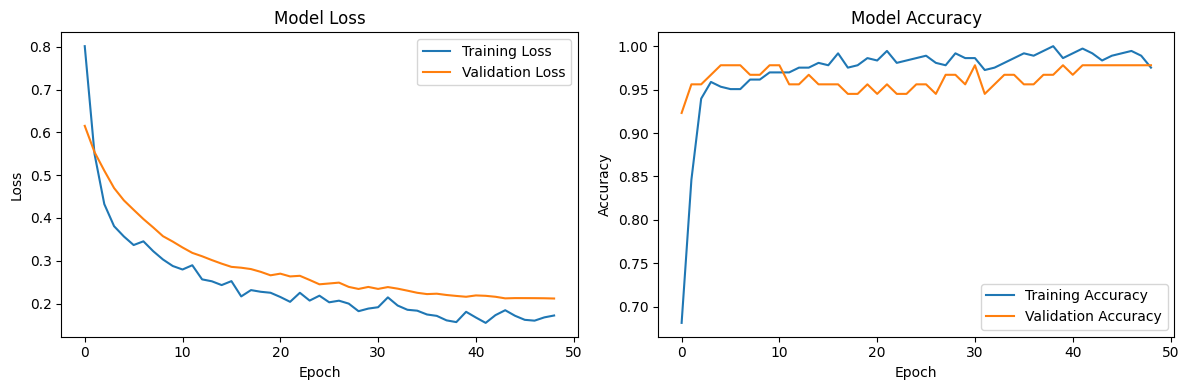

In [24]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss curves
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper right')

# Plot accuracy curves
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

Trial 90 Complete [00h 00m 11s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 07m 07s
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9643 - loss: 0.2597 - val_accuracy: 0.9670 - val_loss: 0.2132 - learning_rate: 0.0077
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9643 - loss: 0.2475 - val_accuracy: 0.9890 - val_loss: 0.1993 - learning_rate: 0.0077
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9533 - loss: 0.2941 - val_accuracy: 0.9780 - val_loss: 0.1687 - learning_rate: 0.0077
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9560 - loss: 0.2606 - val_accuracy: 0.9780 - val_loss: 0.1709 - learning_rate: 0.0077
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9725 - loss: 0.2060 - val_accuracy: 0.9780 - val_loss: 0.1763 - learning_rate: 0.0077
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9808 - loss: 0.1835 - val_accuracy: 0.9890 - val_loss: 0.1439 - le

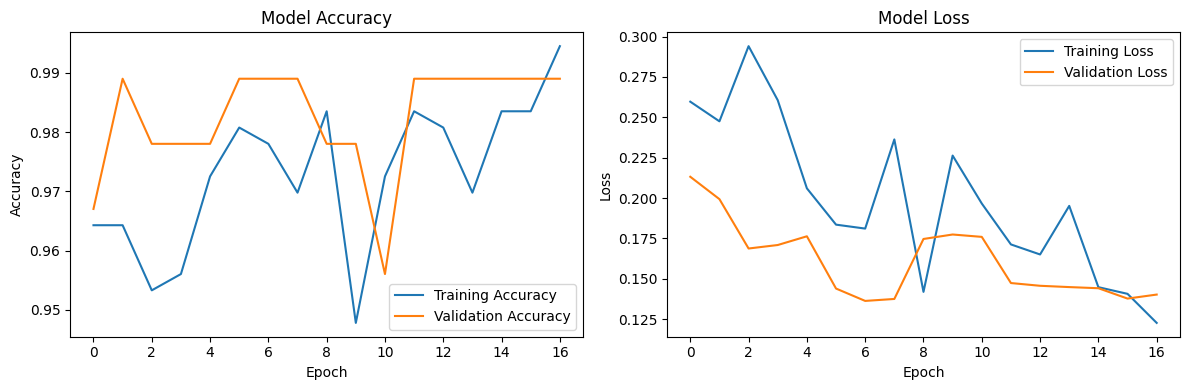


Best Hyperparameters:
units_1: 192
l2_1: 0.0006593135819886603
dropout_1: 0.4
units_2: 128
l2_2: 0.000854733632415856
dropout_2: 0.2
units_3: 48
l2_3: 0.0007550512369503543
dropout_3: 0.1
lr: 0.0076891335910928725
tuner/epochs: 6
tuner/initial_epoch: 2
tuner/bracket: 3
tuner/round: 1
tuner/trial_id: 0027


In [27]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hypermodel for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=64, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train_scaled.shape[1],),
        kernel_regularizer=l2(hp.Float('l2_1', min_value=1e-4, max_value=1e-2, sampling='log'))
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Hidden layer 1
    model.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=128, step=16),
        kernel_regularizer=l2(hp.Float('l2_2', min_value=1e-4, max_value=1e-2, sampling='log'))
    ))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.4, step=0.1)))
    
    # Hidden layer 2
    model.add(Dense(
        units=hp.Int('units_3', min_value=16, max_value=64, step=16),
        kernel_regularizer=l2(hp.Float('l2_3', min_value=1e-4, max_value=1e-2, sampling='log'))
    ))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.3, step=0.1)))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Configure Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='breast_cancer'
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Search for best hyperparameters
tuner.search(
    X_train_scaled, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train best model
history = best_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred = (best_model.predict(X_test_scaled) > 0.5).astype(int)

# Print results
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print best hyperparameters
print("\nBest Hyperparameters:")
for hp in best_hps.values:
    print(f"{hp}: {best_hps.values[hp]}")

In [26]:
%pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [keras_tuner]
Note: you may need to restart the kernel to use updated packages.


Epoch 1/100


/mnt/870cc35c-9667-4587-917b-ab53a7d94aa3/Python Project/.venv/lib64/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9038 - loss: 0.4750 - val_accuracy: 0.9890 - val_loss: 0.2964 - learning_rate: 0.0077
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9478 - loss: 0.3927 - val_accuracy: 0.9780 - val_loss: 0.3022 - learning_rate: 0.0077
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9533 - loss: 0.3374 - val_accuracy: 0.9890 - val_loss: 0.2470 - learning_rate: 0.0077
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9670 - loss: 0.3192 - val_accuracy: 0.9890 - val_loss: 0.2254 - learning_rate: 0.0077
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9643 - loss: 0.2864 - val_accuracy: 0.9890 - val_loss: 0.2162 - learning_rate: 0.0077
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9505 - loss: 0.3024 - val_accuracy: 0.9890 - val_loss: 0.1913 - learning_rate: 0.0077
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9588 - loss: 0.2636 - val_accuracy: 0.98

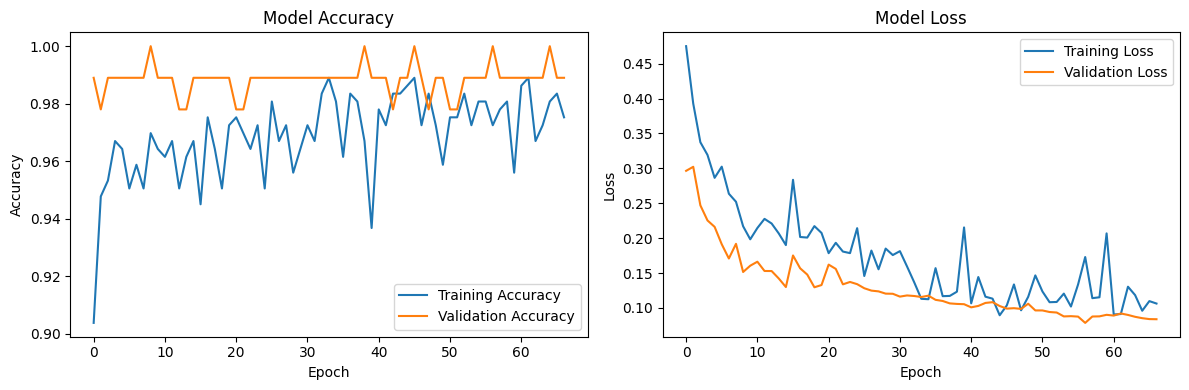

In [28]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define model with best hyperparameters
model = Sequential([
    # Input layer
    Dense(units=192, input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.0006593135819886603)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),
    
    # Hidden layer 1
    Dense(units=128, kernel_regularizer=l2(0.000854733632415856)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    
    # Hidden layer 2
    Dense(units=48, kernel_regularizer=l2(0.0007550512369503543)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),
    
    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0076891335910928725),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Print results
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()